In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
matrix1 = tf.constant([[3, 3]])
matrix2 = tf.constant([[2],
                      [2]])

prod = tf.matmul(matrix1,matrix2)
sess = tf.Session()
sess.run(prod)

In [5]:
prod = tf.matmul(matrix1,matrix2)
with tf.Session() as sess:
    result2 = sess.run(prod)
    print(result2)

[[12]]


In [7]:
tf.__version__

'1.1.0'

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [13]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [14]:
data.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [19]:
a = data.test.labels[0,:]
a

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [42]:
a = data.train.images[2,:].reshape(28,28)

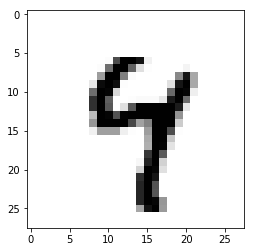

In [43]:
plt.imshow(a,cmap='Greys')

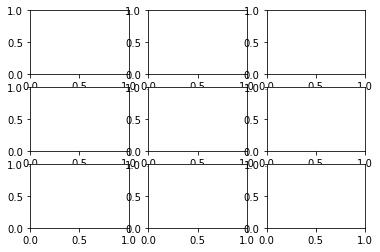

In [47]:
print(axes)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x12ef46fd0>


In [95]:
x1 = tf.constant([[1,2,3],
             [3,6,7],
             [1,1,1]])
x2 = tf.constant([[1],
             [3],
             [1]])
res = tf.multiply(x1,x2)
#print(res)

In [96]:
sess = tf.Session()
print(sess.run(res))

[[ 1  2  3]
 [ 9 18 21]
 [ 1  1  1]]


In [51]:
from tensorflow.examples.tutorials.mnist import input_data

In [52]:
mnist = input_data.read_data_sets("/tmp/data", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [53]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_h13 = 500
n_classes = 10

In [54]:
batch_size = 100

In [56]:
x = tf.placeholder('float32',[None, 784])
y = tf.placeholder('float32')

In [106]:
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784,n_nodes_hl1])),
                     'biases':tf.Variable(tf.random_normal(n_nodes_hl1))}
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),
                     'biases':tf.Variable(tf.random_normal(n_nodes_hl2))}
    
    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),
                     'biases':tf.Variable(tf.random_normal(n_nodes_hl3))}
    
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_classes])),
                   'biases':tf.Variable(tf.random_normal(n_classes))}
    
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']),hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']),hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']),hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    output = tf.matmul(l3, output_layer['weights']) + output_layer['biases']
    
    return output
    
    
    
    
    
    

In [107]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction,y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    epochs = 10
    with tf.Session as sess:
        sess.run(tf.initialize_all_variables())
        for epoch in epochs:
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                x,y = mnist.train.next_batch(batch_size)
                _,c = sess.run([optimizer,cost], feed_dict ={x:x,y:y})
                epoch_loss +=c
            print('Epoch',epoch,'completed out of ',epochs,'loss: ',epoch_loss)
        correct = tf.equal(tf.argmax(prediction,1), tf.argmax(prediction,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

In [108]:
train_neural_network(x)

ValueError: Shape must be rank 1 but is rank 0 for 'random_normal_4/RandomStandardNormal' (op: 'RandomStandardNormal') with input shapes: [].